# Fase I. Business Understanding. Definición de necesidades del cliente (comprensión del negocio)

### Esta fase inicial se enfoca en la comprensión de los objetivos de proyecto. Después se convierte este conocimiento de los datos en la definición de un problema de minería de datos y en un plan preliminar diseñado para alcanzar los objetivos.

## Contexto

La Organización Mundial de la Salud (WHO) apunta que los accidentes cerebrovasculares son los segundos en el ranking de enfermedades con causa de muerte. No obstante, en la mayoría de los casos se puede prevenir si se tienen en cuenta los indicadores causantes de estos.

El presente dataset está orientado a la predecir, con base en ciertos parámetros, si una persona probablemente sufrirá de un accidente de este tipo. 
Cada fila tiene datos relevantes y afínes a la predicción de la enfermedad, y los atributos son los siguientes:

Información de los atributos:
    
##### Predictores
    1) id: Identificador único
    2) gender: "Hombre", "Mujer" u "Otro"
    3) age: Edad del paciente
    4) hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente sí tiene hipertensión
    5) heart_disease: 0 si el paciente no tiene ninguna enfermedad al corazón, 1 si el paciente tiene una enfermedad al corazón
    6) ever_married: "No" o "Sí"
    7) work_type: "hijos", "Trabajo en el gobierno", "Nunca ha trabajado", "Privado" o "Independiente"
    8) Residence_type: tipo de residencia del individuo, "Rural" o "Urbano"
    9) avg_glucose_level: Promedio del nivel de glucosa en la sangre del individuo
    10) bmi: Índice de masa corporal del individuo
    11) smoking_status: "Fumaba", "Nunca ha fumado", "Fuma" o "No se sabe"
    
##### Resultado
    12) stroke: 1 si el paciente ha tenido un accidente cerebrovascular 0 si no

Fuentes:
- https://www.who.int/es/news-room/fact-sheets/detail/the-top-10-causes-of-death
- https://www.who.int/es/news/item/16-09-2021-who-ilo-almost-2-million-people-die-from-work-related-causes-each-year

# Enunciado del problema

### Demostrar la relación entre los "malos hábitos" con los casos de accidentes cerebrovascular, y predecir la probabilidad de que ocurra dependiendo de tales parámetros.

# Fase II. Data Understanding. Estudio y comprensión de los datos

### La fase de entendimiento de datos comienza con la colección de datos inicial y continúa con las actividades que permiten familiarizarse con los datos, identificar los problemas de calidad, descubrir conocimiento preliminar sobre los datos, y/o descubrir subconjuntos interesantes para formar hipótesis en cuanto a la información oculta.


In [50]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [51]:
mainpath = "../datasets/"
filename = "healthcare-dataset-stroke-data.csv"
fullpath = os.path.join(mainpath, filename)

In [52]:
df = pd.read_csv(fullpath, delimiter=";", encoding='utf-8')

In [53]:
# filas y columnas
df.shape

(5110, 12)

In [54]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [55]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [56]:
# Cantidad, nombres y tipos de dato de las columnas, cantidad de datos no-nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [57]:
# Confirmación de la cantidad de datos nulos en la col 'bmi'
pd.isnull(df["bmi"]).values.ravel().sum()

201

In [58]:
# Confirmación de que todos los nulos pertenecen a la columna 'bmi'
pd.isnull(df).values.ravel().sum()

201

In [59]:
# Estadísticas de datos numéricos
round(df.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [60]:
# Estadísticas de datos categóricos
round(df.describe(exclude = ['float','int64']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [61]:
#Datos únicos por columna
print(df['gender'].unique())
print(df['work_type'].unique())
print(df['smoking_status'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [62]:
#Resultado
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [63]:
pd.isnull(df["stroke"]).values.ravel().sum()

0

In [64]:
df2 = df[(df["smoking_status"]=="smokes") & (df["stroke"]==1) | (df["smoking_status"]=="formerly smoked")  & (df["stroke"]==1)]
df2.shape

(112, 12)

In [65]:
df3 = df[(df["smoking_status"]=="Unknown") & (df["stroke"]==1)]
df3.shape

(47, 12)

In [66]:
df4 = df[(df["smoking_status"]=="never smoked") & (df["stroke"]==1)]
df4.shape

(90, 12)

In [67]:
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [68]:
dfstroke = df[(df["stroke"]==1)]

In [69]:
x = df['stroke'].value_counts().to_frame()
a = df['stroke'].unique()
dfstroke2 = pd.DataFrame(x)
dfstroke2 = dfstroke2.reset_index()
dfstroke2.columns = ['stroke', 'count'] # change column names


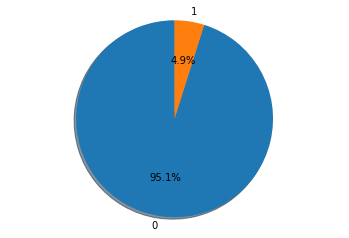

In [70]:
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

 
# Adding legend
fig1, ax1 = plt.subplots()
ax1.pie(dfstroke2['count'], labels=dfstroke2['stroke'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show() 

# Fase III. Data Preparation. Análisis de los datos y selección de características

### La fase de preparación de datos cubre todas las actividades necesarias para construir el conjunto final de datos (los datos que se utilizarán en las herramientas de modelado) a partir de los datos en bruto iniciales. Las tareas incluyen la selección de tablas, registros y atributos, así como la transformación y la limpieza de datos para las herramientas que modelan. Esta fase, generalmente, consume aproximadamente el 90% del tiempo del proyecto.

# Fase IV. Modeling. Modelado

### En esta fase, se seleccionan y aplican las técnicas de modelado que sean pertinentes al problema (cuantas más mejor), y se calibran sus parámetros a valores óptimos. Típicamente hay varias técnicas para el mismo tipo de problema de minería de datos. Algunas técnicas tienen requerimientos específicos sobre la forma de los datos. Por lo tanto, casi siempre en cualquier proyecto se acaba volviendo a la fase de preparación de datos.

# Fase V. Evaluation. Evaluación (obtención de resultados)

### En esta etapa en el proyecto, se han construido uno o varios modelos que parecen alcanzar calidad suficiente desde la una perspectiva de análisis de datos. Antes de proceder al despliegue final del modelo, es importante evaluarlo a fondo y revisar los pasos ejecutados para crearlo, comparar el modelo obtenido con los objetivos de negocio. Un objetivo clave es determinar si hay alguna cuestión importante de negocio que no haya sido considerada suficientemente. Al final de esta fase, se debería obtener una decisión sobre la aplicación de los resultados del proceso de análisis de datos.

# Fase VI. Deployment. Despliegue (puesta en producción)

### Generalmente, la creación del modelo no es el final del proyecto. Incluso si el objetivo del modelo es de aumentar el conocimiento de los datos, el conocimiento obtenido tendrá que organizarse y presentarse para que el cliente pueda usarlo. Dependiendo de los requisitos, la fase de desarrollo puede ser tan simple como la generación de un informe o tan compleja como la realización periódica y quizás automatizada de un proceso de análisis de datos en la organización.